# Praktische Übung 6: Neural Networks

In this exercise, we want to train a neural network on the Digits dataset, that we already used earlier.
Go through the following steps:

1. Read through the notebook `8_NeuralNetworks.ipynb` in our GitHub repository. Try to understand what is going on there and run the code to train the model. 
2. Our accuracy is not so good on the test data. Try the following to improve the model:
    - Increase the hidden layer size to 10 neurons, train the model and compare the accuracy on the test data.
    - Add a second hidden layer with 5 neurons, train the model and compare the accuracy on the test data.
3. Check if you can decrease the training loss even further if you train for more epochs. However, this can easily result in overfitting. To check that, calculate the accuracy on the test data already during training after each epoch. Show the plot the results as a second plot similiar to the one above. (Note: Normally we need to do this check on seperate validation data, not on our test data).
4. Take the titanic data set and try to train a neural network on it. Use only the label `Survived` and the features `Pclass`, `Age`, `Sibsp`, `Parch` and `Fare`. Drop all N/As before training.

In [1]:
import numpy as np
import torch
import torch.nn.functional as F
import torch.nn as nn
import matplotlib.pyplot as plt

torch.manual_seed(1)
np.random.seed(1)

In [2]:
if(torch.cuda.is_available()):
  processing_chip = "cuda:0"
  print(f"{torch.cuda.get_device_name(0)} available")
else:
  processing_chip = "cpu"
  print("No GPU available")

device = torch.device(processing_chip)
device

No GPU available


device(type='cpu')

In [3]:
import pandas as pd
data = pd.read_csv("data/digits.csv")
data.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [4]:
X = data.drop(["label"], axis=1)
y = data["label"]

In [5]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
train_X

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
1109,0.0,0.0,0.0,9.0,15.0,2.0,0.0,0.0,0.0,0.0,...,15.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,6.0
940,0.0,3.0,12.0,12.0,14.0,4.0,0.0,0.0,0.0,1.0,...,8.0,0.0,0.0,2.0,13.0,16.0,16.0,16.0,2.0,0.0
192,0.0,1.0,10.0,15.0,16.0,13.0,3.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,15.0,13.0,7.0,0.0,0.0,0.0
260,0.0,0.0,0.0,12.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,9.0,0.0,0.0,0.0
1148,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,12.0,12.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,0.0,1.0,8.0,14.0,15.0,2.0,0.0,0.0,0.0,2.0,...,1.0,0.0,0.0,1.0,9.0,12.0,13.0,9.0,0.0,0.0
1216,0.0,2.0,9.0,15.0,16.0,15.0,2.0,0.0,0.0,11.0,...,7.0,0.0,0.0,0.0,12.0,16.0,15.0,9.0,1.0,0.0
1653,0.0,0.0,5.0,14.0,14.0,2.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,9.0,13.0,0.0,0.0,0.0,0.0
559,0.0,0.0,4.0,10.0,15.0,16.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,16.0,4.0,0.0,0.0,0.0


In [7]:
train_x = torch.Tensor(train_X.values).float().to(device)
test_x = torch.Tensor(test_X.values).float().to(device)
train_y =torch.Tensor(train_y.values).long().to(device)
test_y = torch.Tensor(test_y.values).long().to(device)

In [8]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.hidden = nn.Linear(64, 5)
        self.output = nn.Linear(5, 10)

    def forward(self, x):
        z = F.relu(self.hidden(x))
        z = self.output(z)  # no softmax. see CrossEntropyLoss() 
        return z

In [9]:
# create network, move it to device and set it to training-mode
net = Net().to(device)
net.train()

# define the parameters for training
no_epochs = 1000
learning_rate = 0.01
loss_func = nn.CrossEntropyLoss()  # applies softmax() internally
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)

print("\nStarting training ")

train_losses = []
for epoch in range(0, no_epochs):

  optimizer.zero_grad()
  y_hat = net(train_x)

  loss = loss_func(y_hat, train_y)
  loss.backward()
  optimizer.step()

  train_losses.append(loss.item())
  
  if epoch % 100 == 0:
    print(f"Loss in epoch {epoch} is {loss.item()}")

print("Done training ")


Starting training 
Loss in epoch 0 is 3.743176221847534
Loss in epoch 100 is 1.3639392852783203
Loss in epoch 200 is 1.0346410274505615
Loss in epoch 300 is 0.842546820640564
Loss in epoch 400 is 0.7122358083724976
Loss in epoch 500 is 0.6173369884490967
Loss in epoch 600 is 0.5066495537757874
Loss in epoch 700 is 0.39754775166511536
Loss in epoch 800 is 0.3410201668739319
Loss in epoch 900 is 0.30945470929145813
Done training 


Text(0, 0.5, 'loss')

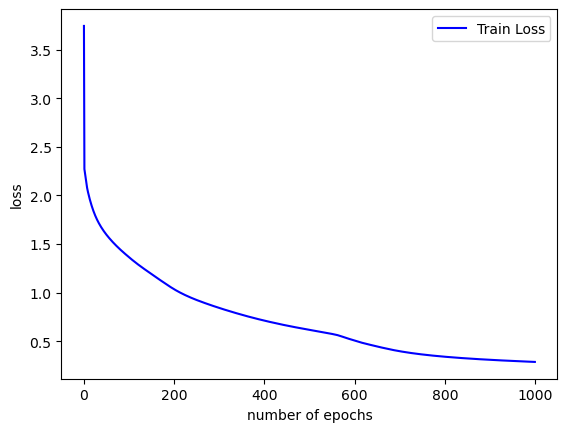

In [10]:
fig = plt.figure()
plt.plot(range(0, no_epochs), train_losses, color='blue')
plt.legend(['Train Loss'], loc='upper right')
plt.xlabel('number of epochs')
plt.ylabel('loss')

In [12]:
net.eval() # set network to evaluation mode
y_pred = net(test_x)
_, predicted = torch.max(y_pred.data, 1)
correct = (predicted == test_y).sum().item()
print(f"Accuarcy is {100. * correct / len(test_x)}%")

Accuarcy is 89.44444444444444%


In [20]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.hidden = nn.Linear(64, 10)
        self.output = nn.Linear(10, 10)

    def forward(self, x):
        z = F.relu(self.hidden(x))
        z = self.output(z)  # no softmax. see CrossEntropyLoss() 
        return z

In [24]:
# create network, move it to device and set it to training-mode
net = Net().to(device)
net.train()

# define the parameters for training
no_epochs = 1000
learning_rate = 0.01
loss_func = nn.CrossEntropyLoss()  # applies softmax() internally
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)

print("\nStarting training ")

train_losses = []
for epoch in range(0, no_epochs):

  optimizer.zero_grad()
  y_hat = net(train_x)

  loss = loss_func(y_hat, train_y)
  loss.backward()
  optimizer.step()

  train_losses.append(loss.item())
  
  if epoch % 100 == 0:
    print(f"Loss in epoch {epoch} is {loss.item()}")

print("Done training ")


Starting training 
Loss in epoch 0 is 3.092170238494873
Loss in epoch 100 is 0.6474493145942688
Loss in epoch 200 is 0.3153732717037201
Loss in epoch 300 is 0.21392321586608887
Loss in epoch 400 is 0.1693003624677658
Loss in epoch 500 is 0.14362211525440216
Loss in epoch 600 is 0.12608075141906738
Loss in epoch 700 is 0.11293641477823257
Loss in epoch 800 is 0.10234454274177551
Loss in epoch 900 is 0.09364733099937439
Done training 


Text(0, 0.5, 'loss')

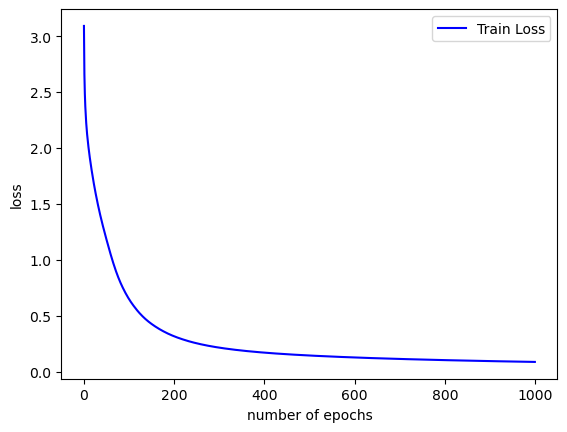

In [25]:
fig = plt.figure()
plt.plot(range(0, no_epochs), train_losses, color='blue')
plt.legend(['Train Loss'], loc='upper right')
plt.xlabel('number of epochs')
plt.ylabel('loss')

In [26]:
net.eval() # set network to evaluation mode
y_pred = net(test_x)
_, predicted = torch.max(y_pred.data, 1)
correct = (predicted == test_y).sum().item()
print(f"Accuarcy is {100. * correct / len(test_x)}%")

Accuarcy is 94.72222222222223%


## Mit mehr Neuronen im Hidden Layer, um knapp 5% genauer

In [40]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.hidden = nn.Linear(64, 5)
        self.hidden2 = nn.Linear(5, 5)
        self.output = nn.Linear(5, 10)

    def forward(self, x):
        z = F.relu(self.hidden(x))
        z = F.relu(self.hidden2(z))
        z = self.output(z)  # no softmax. see CrossEntropyLoss() 
        return z

In [41]:
# create network, move it to device and set it to training-mode
net = Net().to(device)
net.train()

# define the parameters for training
no_epochs = 1000
learning_rate = 0.01
loss_func = nn.CrossEntropyLoss()  # applies softmax() internally
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)

print("\nStarting training ")

train_losses = []
for epoch in range(0, no_epochs):

  optimizer.zero_grad()
  y_hat = net(train_x)

  loss = loss_func(y_hat, train_y)
  loss.backward()
  optimizer.step()

  train_losses.append(loss.item())
  
  if epoch % 100 == 0:
    print(f"Loss in epoch {epoch} is {loss.item()}")

print("Done training ")


Starting training 
Loss in epoch 0 is 2.3665196895599365
Loss in epoch 100 is 2.0779080390930176
Loss in epoch 200 is 1.9396971464157104
Loss in epoch 300 is 1.7470234632492065
Loss in epoch 400 is 1.6145230531692505
Loss in epoch 500 is 1.4924424886703491
Loss in epoch 600 is 1.354475498199463
Loss in epoch 700 is 1.23759925365448
Loss in epoch 800 is 1.1190093755722046
Loss in epoch 900 is 0.9401322603225708
Done training 


Text(0, 0.5, 'loss')

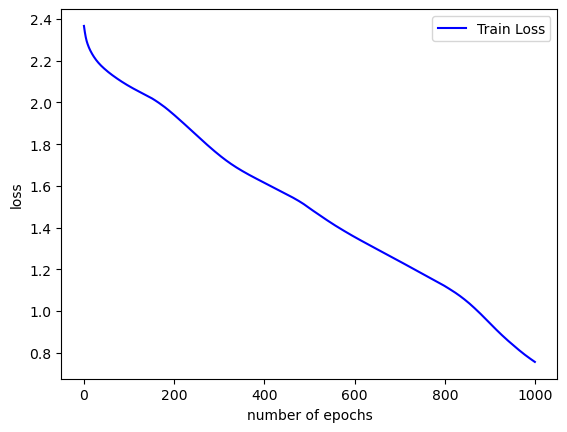

In [42]:
fig = plt.figure()
plt.plot(range(0, no_epochs), train_losses, color='blue')
plt.legend(['Train Loss'], loc='upper right')
plt.xlabel('number of epochs')
plt.ylabel('loss')

In [43]:
net.eval() # set network to evaluation mode
y_pred = net(test_x)
_, predicted = torch.max(y_pred.data, 1)
correct = (predicted == test_y).sum().item()
print(f"Accuarcy is {100. * correct / len(test_x)}%")

Accuarcy is 68.05555555555556%


## Mit nur 2ten hidden layer wird die accuracy kleiner

In [44]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.hidden = nn.Linear(64, 10)
        self.hidden2 = nn.Linear(10, 10)
        self.output = nn.Linear(10, 10)

    def forward(self, x):
        z = F.relu(self.hidden(x))
        z = self.output(z)  # no softmax. see CrossEntropyLoss() 
        return z

In [45]:
# create network, move it to device and set it to training-mode
net = Net().to(device)
net.train()

# define the parameters for training
no_epochs = 1000
learning_rate = 0.01
loss_func = nn.CrossEntropyLoss()  # applies softmax() internally
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)

print("\nStarting training ")

train_losses = []
for epoch in range(0, no_epochs):

  optimizer.zero_grad()
  y_hat = net(train_x)

  loss = loss_func(y_hat, train_y)
  loss.backward()
  optimizer.step()

  train_losses.append(loss.item())
  
  if epoch % 100 == 0:
    print(f"Loss in epoch {epoch} is {loss.item()}")

print("Done training ")


Starting training 
Loss in epoch 0 is 2.862462282180786
Loss in epoch 100 is 1.3704255819320679
Loss in epoch 200 is 0.6182796955108643
Loss in epoch 300 is 0.3370630741119385
Loss in epoch 400 is 0.237854465842247
Loss in epoch 500 is 0.18983331322669983
Loss in epoch 600 is 0.16095441579818726
Loss in epoch 700 is 0.1411643624305725
Loss in epoch 800 is 0.12628620862960815
Loss in epoch 900 is 0.11439911276102066
Done training 


Text(0, 0.5, 'loss')

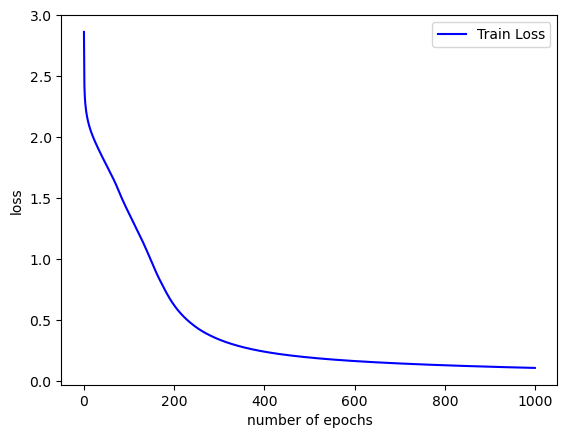

In [46]:
fig = plt.figure()
plt.plot(range(0, no_epochs), train_losses, color='blue')
plt.legend(['Train Loss'], loc='upper right')
plt.xlabel('number of epochs')
plt.ylabel('loss')

In [47]:
net.eval() # set network to evaluation mode
y_pred = net(test_x)
_, predicted = torch.max(y_pred.data, 1)
correct = (predicted == test_y).sum().item()
print(f"Accuarcy is {100. * correct / len(test_x)}%")

Accuarcy is 94.44444444444444%


## Mit beiden Zusammen auch bei 5% increase

In [56]:
# create network, move it to device and set it to training-mode
net = Net().to(device)
net.train()

epochs = []
accuracy = []

# define the parameters for training
no_epochs = 10000
learning_rate = 0.01
loss_func = nn.CrossEntropyLoss()  # applies softmax() internally
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)

print("\nStarting training ")

train_losses = []
for epoch in range(0, no_epochs):

  optimizer.zero_grad()
  y_hat = net(train_x)

  loss = loss_func(y_hat, train_y)
  loss.backward()
  optimizer.step()

  train_losses.append(loss.item())
  
  net.eval() # set network to evaluation mode
  y_pred = net(test_x)
  _, predicted = torch.max(y_pred.data, 1)
  correct = (predicted == test_y).sum().item()
  #print(f"Accuarcy is {100. * correct / len(test_x)}%")
  #print(f"Loss in epoch {epoch} is {loss.item()}")
  epochs.append(epoch)
  accuracy.append(100. * correct / len(test_x))

print("Done training ")


Starting training 
Done training 


Text(0, 0.5, 'loss')

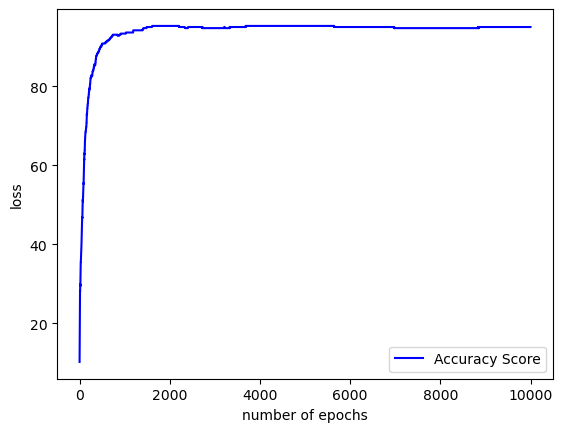

In [59]:
#plot epochs and accuracy
fig = plt.figure()
plt.plot(epochs, accuracy, color='blue')
plt.legend(['Accuracy Score'])
plt.xlabel('number of epochs')
plt.ylabel('loss')


### Titanic

Take the titanic data set and try to train a neural network on it. Use only the label `Survived` and the features `Pclass`, `Age`, `Sibsp`, `Parch` and `Fare`. Drop all N/As before training.

In [65]:
titanic_df = pd.read_csv("data/titanic.csv")
features = ["Pclass", "Age", "Fare", "SibSp", "Parch"]
labels = ["Survived"]

titanic_df.dropna(inplace=True)

features = titanic_df[features]
labels = titanic_df["Survived"]
features.head()

,Pclass,Age,Fare,SibSp,Parch
1,1,38.0,71.2833,1,0
3,1,35.0,53.1000,1,0
6,1,54.0,51.8625,0,0
10,3,4.0,16.7000,1,1
11,1,58.0,26.5500,0,0



Starting training 
Done training 


Text(0, 0.5, 'loss')

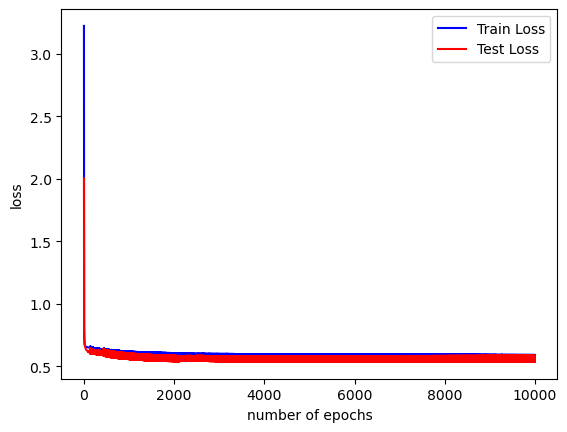

In [74]:

train_X, test_X, train_y, test_y = train_test_split(features, labels, test_size=0.2, random_state=0)

train_X = torch.Tensor(train_X.values).float().to(device)
test_X = torch.Tensor(test_X.values).float().to(device)
train_y =torch.Tensor(train_y.values).long().to(device)
test_y = torch.Tensor(test_y.values).long().to(device)


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.hidden = nn.Linear(5, 5)
        self.output = nn.Linear(5, 2)

    def forward(self, x):
        z = F.relu(self.hidden(x))
        z = self.output(z)  # no softmax. see CrossEntropyLoss() 
        return z

# create network, move it to device and set it to training-mode
net = Net().to(device)
net.train()

epochs = []
accuracy = []

net = Net().to(device)
net.train()

# define the parameters for training
no_epochs = 10000
learning_rate = 0.01
loss_func = nn.CrossEntropyLoss()  # applies softmax() internally
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)

print("\nStarting training ")

train_losses = []
test_losses = []
for epoch in range(0, no_epochs):

  optimizer.zero_grad()
  output = net(train_X)

  loss = loss_func(output, train_y)
  loss.backward()
  optimizer.step()

  y_test = net(test_X)
  loss_test = loss_func(y_test, test_y)

  train_losses.append(loss.item())
  test_losses.append(loss_test.item())
  
  #if epoch % 100 == 0:
    #print(f"Loss in epoch {epoch} is {loss.item()}")
  

print("Done training ")

fig = plt.figure()
plt.plot(range(0, no_epochs), train_losses, color='blue')
plt.plot(range(0, no_epochs), test_losses, color='red')
plt.legend(['Train Loss', "Test Loss"], loc='upper right')
plt.xlabel('number of epochs')
plt.ylabel('loss')



In [76]:
y_pred = net(test_X)
_, predicted = torch.max(y_pred.data, 1)
correct = (predicted == test_y).sum().item()
print(f"Accuarcy is {100. * correct / len(test_X)}%")

Accuarcy is 78.37837837837837%
